# Enter Student Name & ID

In [13]:
student_id = 400102114  #@param {type:"integer"}
student_name = "Matin Mirzababaei" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400102114
your name: Matin Mirzababaei


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [14]:
import numpy as np

In [15]:
def myPCA(X, num_components):
    n, d = X.shape
    # Centering the data
    X_centered = X - np.mean(X, axis=0)
    # Calculating the covariance matrix
    covariance_matrix = np.dot(X_centered.T, X_centered) / n
    # Performing SVD
    U, Sigma, Vt = np.linalg.svd(covariance_matrix)
    # Sorting eigenvectors based on eigenvalues
    V = Vt.T
    eigenvectors = V[:, :num_components]
    # Projecting the data onto the principal components
    transformed_data = np.dot(X_centered, eigenvectors)
    
    return transformed_data, eigenvectors

def myPCA_pred(x_test, vectors):
    return np.dot(x_test - np.mean(x_test, axis=0), vectors)



### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

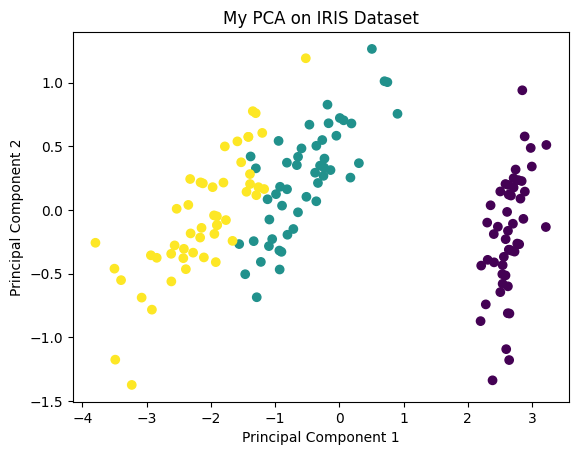

In [17]:
# myPCA on IRIS 

# # Load the IRIS dataset
iris = load_iris()
iris_pca, eigenvectors = myPCA(iris.data, 2)
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris.target)
plt.title('My PCA on IRIS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. They represent the principal components of the distribution of faces in a high-dimensional image space. Each eigenface can be viewed as a "basis image" that, when combined with other eigenfaces, can approximate a face image.

Each face image in the dataset is represented as a high-dimensional vector. For example, a 100x100 pixel image is represented as a vector of length 10,000 (100 * 100). The mean face (average of all face images) is calculated, and this mean face is subtracted from each face image vector to center the data. The covariance matrix of these centered vectors is computed. This matrix captures the relationships between different pixel values across all images. PCA involves computing the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors corresponding to the largest eigenvalues represent the directions in which the data varies the most. In the context of face images, these eigenvectors are called eigenfaces. By selecting a subset of eigenfaces (those corresponding to the top eigenvalues), we can reduce the dimensionality of the data. Each face image can then be approximated by a linear combination of these selected eigenfaces. For face recognition, a new face image is projected onto the space spanned by the selected eigenfaces. The resulting coordinates (coefficients in the linear combination) are used to compare the new face to known faces in the dataset.


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [18]:
import cv2


folder_number = 40
im_number = 10

def get_image(i, j):
    return cv2.imread(f'FacesDataset1/ORL/s{i+1}/{j+1}.bmp', cv2.IMREAD_GRAYSCALE).flatten() / 255.0

def get_dataset(shuffle=True, folder_number=folder_number, im_number=im_number):
    x_train, y_train, x_test, y_test = [], [], [], []
    
    for i in range(folder_number):
        for j in range(im_number):
            image = get_image(i, j)
            if j < (im_number / 2):
                x_train.append(image)
                y_train.append(i + 1)
            else:
                x_test.append(image)
                y_test.append(i + 1)
    
    if shuffle:
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        x_test = np.array(x_test)
        y_test = np.array(y_test)
        shuffle_indices_tr = np.random.permutation(len(x_train))
        shuffle_indices_test = np.random.permutation(len(x_test))
        x_train = x_train[shuffle_indices_tr]
        y_train = y_train[shuffle_indices_tr]
        x_test = x_test[shuffle_indices_test]
        y_test = y_test[shuffle_indices_test]
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = get_dataset()



### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [24]:
from sklearn.decomposition import PCA


num_components = 50

# Perform PCA
x_train_pca, eigenvectors = myPCA(x_train, num_components)
x_test_pca = myPCA_pred(x_test, eigenvectors)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [25]:
# # Train LDA classifier on PCA-transformed training data

def lda_train_test(x_train_pca, y_train, x_test_pca, y_test):
    lda = LDA()
    lda.fit(x_train_pca, y_train)
    tr_pred = lda.predict(x_train_pca)
    test_pred = lda.predict(x_test_pca)
    return accuracy_score(y_train, tr_pred), accuracy_score(y_test, test_pred)


# Train and test LDA classifier
train_acc, test_acc = lda_train_test(x_train_pca, y_train, x_test_pca, y_test)
print(f'Training Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Training Accuracy: 1.000
Test Accuracy: 0.935


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


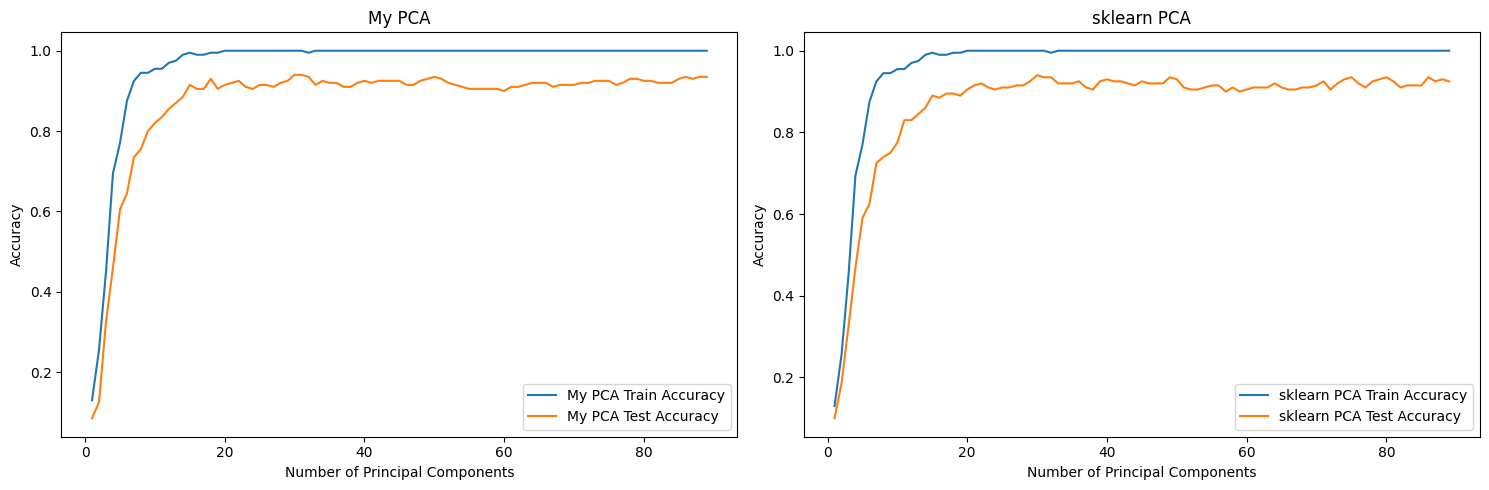

In [27]:
def perform_pca_lda(x_train, y_train, x_test, y_test, dims):
    
    train_accuracy_implemented, test_accuracy_implemented, train_accuracy_sk, test_accuracy_sk = {}, {}, {}, {}
    

    # Implemented PCA
    for i in dims:
        x_train_pca, eigenvectors = myPCA(x_train, i)
        x_test_pca = myPCA_pred(x_test, eigenvectors)
        my_accuracy = lda_train_test(x_train_pca, y_train, x_test_pca, y_test)
        train_accuracy_implemented[i], test_accuracy_implemented[i] = my_accuracy

    # sklearn PCA
    for i in dims:
        pca = PCA(n_components=i)
        pca.fit(x_train)
        x_train_pca = pca.transform(x_train)
        x_test_pca = pca.transform(x_test)
        sk_accuracy = lda_train_test(x_train_pca, y_train, x_test_pca, y_test)
        train_accuracy_sk[i], test_accuracy_sk[i] = sk_accuracy

    return train_accuracy_implemented, test_accuracy_implemented, train_accuracy_sk, test_accuracy_sk

# Perform PCA and LDA for different dimensions
dims = range(1, 90)
train_accuracy_implemented, test_accuracy_implemented, train_accuracy_sk, test_accuracy_sk = perform_pca_lda(x_train, y_train, x_test, y_test, dims)

# Plotting results
plt.figure(figsize=(15, 20))

plt.subplot(2, 1, 1)
plt.plot(train_accuracy_implemented.keys(), train_accuracy_implemented.values(), label='My PCA Train Accuracy')
plt.plot(test_accuracy_implemented.keys(), test_accuracy_implemented.values(), label='My PCA Test Accuracy')
plt.title('Implemented PCA')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy_sk.keys(), train_accuracy_sk.values(), label='sklearn PCA Train Accuracy')
plt.plot(test_accuracy_sk.keys(), test_accuracy_sk.values(), label='sklearn PCA Test Accuracy')
plt.title('sk-learn PCA')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


According to plots, 15 - 20 Principal Components are needed. (Around 60 might be good)